# Изучение закономерностей, определяющих успешность игр

**Описание проекта**


В исходных данных из открытых источников - исторические данные о продажах игр, оценки пользователей и экспертов, жанры, платформы до 2016 года.

Основная задача - выявить определяющие успешность игры закономерности для планирования рекламной компании на 2017 год для интернет-магазина "Стримчик".


**Описание данных**

* Name — название игры;
* Platform — платформа;
* Year_of_Release — год выпуска;
* Genre — жанр игры;
* NA_sales — продажи в Северной Америке (миллионы проданных копий);
* EU_sales — продажи в Европе (миллионы проданных копий);
* JP_sales — продажи в Японии (миллионы проданных копий);
* Other_sales — продажи в других странах (миллионы проданных копий);
* Critic_Score — оценка критиков (максимум 100);
* User_Score — оценка пользователей (максимум 10);
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Общая информация о данных:

Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Прочитаем данные из csv-файла и сохраним переменную `data`:

In [ ]:
data = pd.read_csv('games.csv')

Выведем первые 10 строчек датафрейма датафрейма `data` на экран:

In [ ]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме `data` с помощью метода `info()`:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [ ]:
data.columns = (
    data.columns
    .str.lower()
)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Поиск пропущенных значений

Выведем количество пропущенных значений в каждом столбце:

In [ ]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Посчитаем кол-во строк до удаления пропусков:

In [ ]:
rows_before = len(data)
rows_before

16715

Удалим пропуски в столбцах `name`, `genre` и `year_of_release` и выполним проверку работы кода:

In [ ]:
data = (
    data
    .dropna(subset=['name', 'genre', 'year_of_release'])
    .reset_index(drop=True)
)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Посчитаем кол-во строк после удаления пропусков:

In [ ]:
rows_after = len(data)
rows_after

16444

Найдем процент удаленных пропусков:

In [ ]:
amount_of_na = 100 - (rows_after / rows_before) * 100
round(amount_of_na, 2)

1.62

Заменим пропуски в столбце `rating` словом "другие", так как рейтинг ESRB используется только в США и Канаде:

In [ ]:
data['rating'].fillna('Другие', inplace=True)

Пропуски в столбцах `critic_score`, `user_score` оставим нетронутыми.

Заменим аббревиатуру "tbd" в столбце `user_score` на NaN:

In [ ]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

### Замена типов данных

Преобразуем тип данных в столбце `year_of_release` из float в int и в столбце `user_score` из object в float и выполним проверку:

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Поиск и устранение дубликатов

Проверим наличие явных дубликатов:

In [ ]:
data.duplicated().sum()

0

Найдем неявные дубликаты в столбцах `name`, `platform` и `year_of_release`:

In [ ]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Было найдено одно повторение, удалим его и сбросим индексы:

In [ ]:
data = (
    data
    .drop_duplicates(
        subset=['name', 'platform', 'year_of_release'],
        keep='first'
    )
    .reset_index()
)

Проверим работу кода:

In [ ]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

### Посчитаем суммарные продажи во всех регионах

Добавим в новый столбец `total_sales` расчет суммарных продаж во всех регионах:

In [ ]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Другие,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Другие,31.38


**Вывод**: на шаге предобработки данных названия столбцов датафрейма были приведены к нижнему регистру, так как работа с названиями в нижнем регистре - правило хорошего тона при написании кода.

Далее были обнаружены пропущенные значения в 6 столбцах датафрейма. Пропуски могут появляться в результате технических сбоев при формировании датасета или недоступности информации. В ходе работы были обработаны пропуски во всех столбцах:

* Пропущенные значения в столбцах `name`, `genre` и `year_of_release` были удалены. Кол-во удаленных строк составило 1,6 %, значит удаление пропусков не исказит дальнейшее исследование;

* Пропуски в столбцах `critic_score` и `user_score` нельзя удалять, так как кол-во пропущенных значений очень большое относительно размера датасета. Заменить их также не представляется возможным, потому что оценки и рейтинг индивидуальны для каждой игры и не зависят от параметров, представленных в исходном датасете;

* На пропуски в столбце `rating` была поставлена заглушка, так как в данном столбце присутствует только рейтинг ESRB, действующий в США и Канаде, соответственно на другие страные он не распространяется;

* Аббревиатура "tbd" означает "to be determined", то есть "будет определено". Данная аббревиатура используется, когда решение по какому-либо вопросу еще не принято. В случае с оценками пользователей, вероятно, либо игра была не популярна и пользователи не ставили рейтинг игре, либо агрегатор оценок игр не публикует рейтинг, когда оценок слишком мало. Так как "tbd" не является оценкой, то разумно заменить эту аббревиатуру на NaN, чтобы затем можно было изменить тип данных столбца `user_score` с object на float.

Затем в столбцах `year_of_release` и `user_score` были скорректированы типы данных во избежание ошибок на следующих шагах иследования.

Также были рассчитаны и добавлены в столбец `total_sales` суммарные продажи игр во всех регионах.

## Исследовательский анализ данных

### Распределение игр по годам

Создадим сводную таблицу для оценки, сколько игр выпускалось в каждый год:

In [ ]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.head()

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


На основании сводной таблицы построим столбчатую диаграмму распределения выпущенных игр по годам:

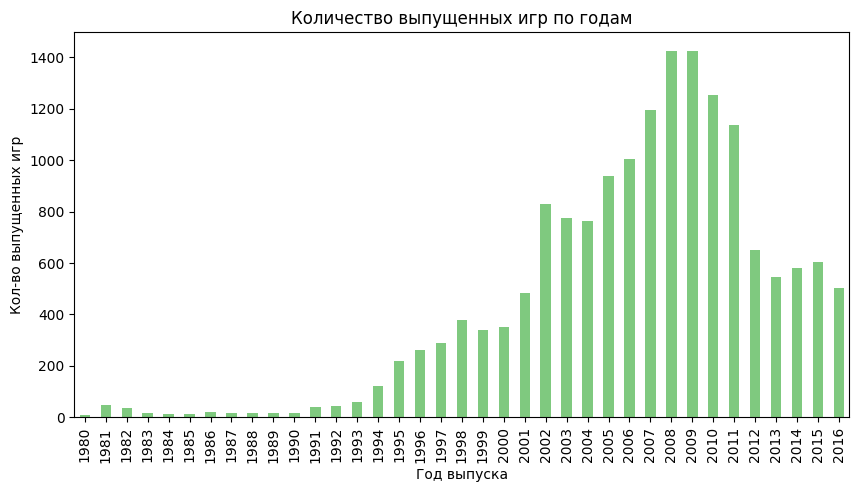

In [ ]:
games_per_year.plot(
    kind='bar',
    figsize=(10, 5),
    title='Количество выпущенных игр по годам',
    legend=False,
    xlabel='Год выпуска',
    ylabel='Кол-во выпущенных игр',
    cmap='Accent'
)
plt.show()

**Вывод:** была построена зависимость количества выпущенных игр от года. Можно увидеть, что пик индустрии приходился на 2008-2009 года, а начиная с 2012 года начался спад.

### Распределение продаж игр по платформам

Создадим сводную таблицу для оценки, сколько игр выпускалось на каждую платформу:

In [ ]:
sales_per_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='count')
sales_per_platform = sales_per_platform.sort_values(by='total_sales')
sales_per_platform.head()

,total_sales
platform,
GG,1
PCFX,1
TG16,2
3DO,3
WS,6


Построим столбчатую диаграмму суммарных продаж по каждой платформе:

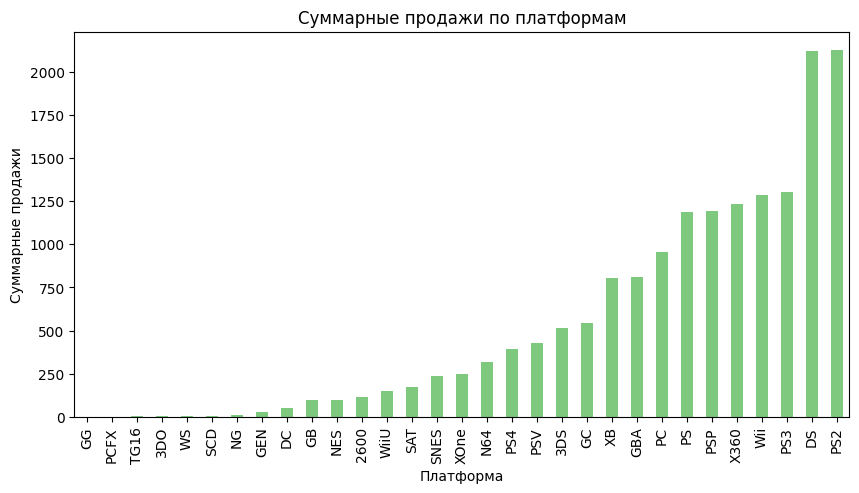

In [ ]:
sales_per_platform.plot(
    kind='bar',
    figsize=(10, 5),
    title='Суммарные продажи по платформам',
    legend=False,
    xlabel='Платформа',
    ylabel='Суммарные продажи',
    cmap='Accent'
)
plt.show()

**Вывод:** самыми популярными платформами оказались PlayStation 2 и Nintendo DS.

Найдем срок эксплуатации платформ:

In [ ]:
#построим сводную таблицу, которая выводит самый первый, самый последний годы выпуска
platform_lifetime = data.pivot_table(
    index='platform',
    values='year_of_release',
    aggfunc=['min', 'max']
    )
#добавим новый столбец, рассчитывающий срок эксплуатации платформы, то есть разницу между годом выпуска последней и первой игры
platform_lifetime['lifetime'] = platform_lifetime['max'] - platform_lifetime['min'] + 1
#отсортируем по сроку эксплуатации
platform_lifetime = platform_lifetime.sort_values(by='lifetime')
platform_lifetime.head()

,min,max,lifetime
,year_of_release,year_of_release,
platform,,,
GG,1992,1992,1
PCFX,1996,1996,1
TG16,1995,1995,1
3DO,1994,1995,2
SCD,1993,1994,2


Построим столбчатую диаграмму, отражающую срок эксплуатации платформ:

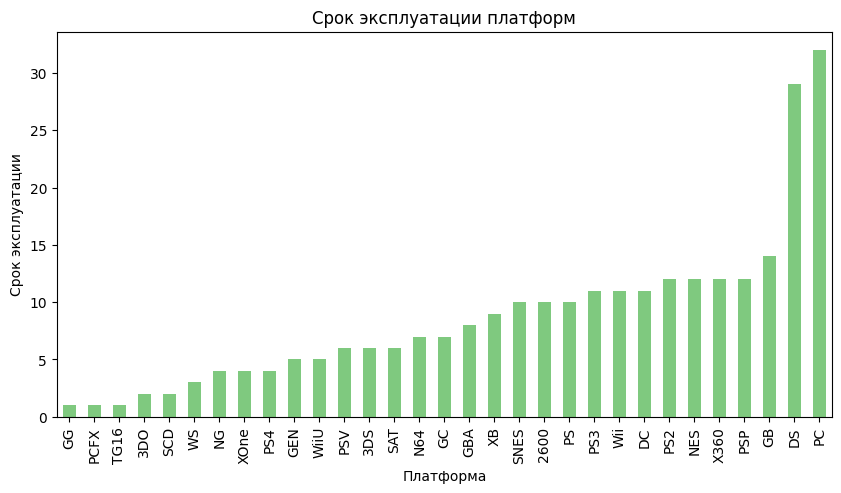

In [ ]:
platform_lifetime.plot(
    kind='bar',
    y='lifetime',
    figsize=(10, 5),
    title='Срок эксплуатации платформ',
    legend=False,
    xlabel='Платформа',
    ylabel='Срок эксплуатации',
    cmap='Accent'
)
plt.show()

Найдем характерный срок жизни платформ:

In [ ]:
lifetime = platform_lifetime['lifetime'].median()
print(f'Характерный срок жизни составляет {lifetime} лет')

Характерный срок жизни составляет 7.0 лет


**Вывод:** игры на PC выпускаются и по сей день, что делает компьютер самой долгоживущей платформой. Также впечатляет срок эксплуатации Nintendo DS. Характерный же срок жизни платформы составляет 6 лет - это медианное значение.

### Актуальные данные

Рассчитаем актуальный период:

Конец 2013 года ознаменовался выходом консолей нового поколения - PS4 и Xbox One. Поэтому актуальными данные будем считать от 2014 года.

In [ ]:
actual_data = (
    data
    .query('year_of_release >= 2014')
    .reset_index(drop=True)
)
actual_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Другие,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Другие,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Другие,7.98


В дальнейшем в исследовании будем работать по датафрейму с актуальными данными.

### Исследование продаж по годам для каждой платформы

Сгруппируем продажи игр по платформе и по году выпуску:

In [ ]:
aggregated_data = (
    actual_data
    .groupby(['platform', 'year_of_release'])
    .agg({'total_sales':'sum'})
)
aggregated_data.head()

total_sales
platform year_of_release             
3DS      2014                   43.76
         2015                   27.78
         2016                   15.14
PC       2014                   13.28
         2015                    8.52

Построим график продаж для каждой платформы по годам:

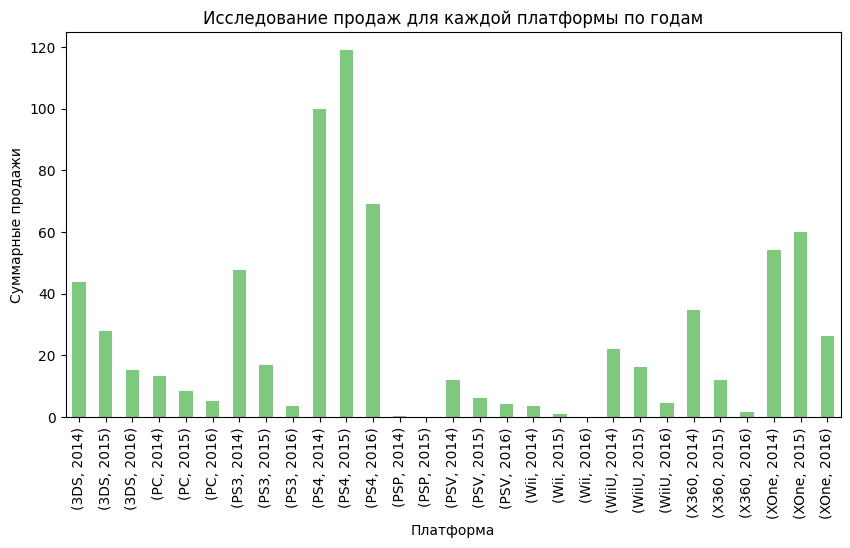

In [ ]:
aggregated_data.plot(
    kind='bar',
    figsize=(10, 5),
    title='Исследование продаж для каждой платформы по годам',
    legend=False,
    xlabel='Платформа',
    ylabel='Суммарные продажи',
    cmap='Accent'
)
plt.show()

По графику видно, что самыми прибыльными платформами сейчас являются PS4 и Xbox One. Выход этих консолей повлек к падению продаж консолей старого поколения - PS3 и X360. Если сравнить PS4 и Xbox One, то превосходство первой очевидно - почти в 2 раза за каждый год.

WiiU, вышедшая в 2012 году, также является обновленной версией Wii, поэтому очень низкие продажи Wii в 2015 и 2016 году неудивительны.

Что касается портативных консолей, здесь доминирование за Nintendo. Последняя версия PSP вышла в 2006 году, а поддержка прекратилась в 2014 году. На смену ей пришла не очень удачная PS Vita в 2011 году, она не пользовалась популярностью у геймеров. Продажи консоли Nintendo 3DS падали, но это было неудивительно на волне слухов о следующем поколении - Nintendo Switch, которая выйдет в 2017 году.

### Исследование "ящиков с усами" по продажам для каждой платформы

Создадим список уникальных названий платформ:

In [ ]:
names = actual_data['platform'].unique()
names

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Создадим цикл, в который будут добавляться столбцы продаж по каждой платформе из списка уникальных названий:

In [ ]:
sales_box = []
for i in names:
    sales_box.append(actual_data[actual_data['platform'] == i]['total_sales'])

Построим общий график:

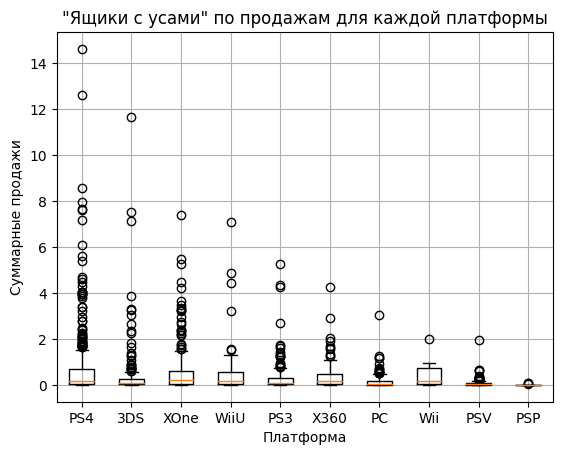

In [ ]:
plt.boxplot(sales_box, labels = names)
plt.title('"Ящики с усами" по продажам для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.grid(True)

Приблизим сами "ящики с усами":

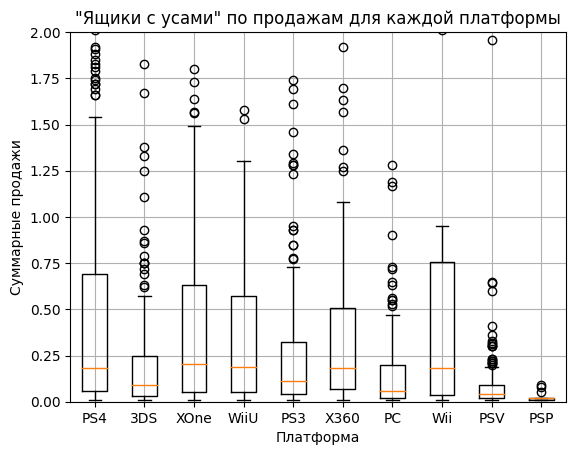

In [ ]:
plt.boxplot(sales_box, labels = names)
plt.title('"Ящики с усами" по продажам для каждой платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.ylim(0, 2)
plt.grid(True)

Ящик с усами подтверждает, что PS4 и Xbox One являются самыми прибыльными платформами, а PSP и PSV наоборот.

### Исследование влияния отзывов на продажи

In [ ]:
ps4_data = (
    actual_data
    .query('platform == "PS4"')
    .reset_index(drop=True)
)
ps4_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Другие,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
3,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Другие,7.98
4,92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Построим диаграму рассеивания и найдем коэффициент корреляции:

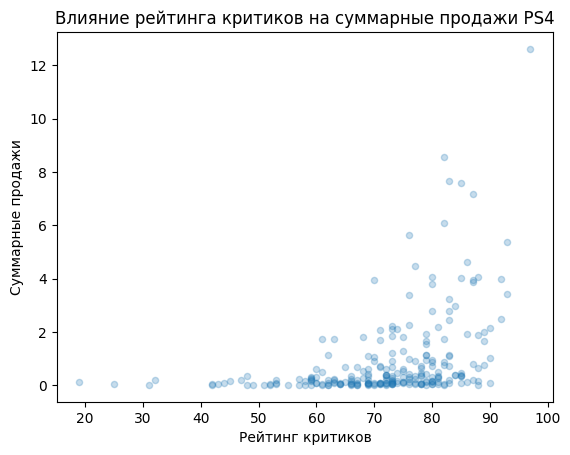

Коэффициент корреляции составляет: 0.403


In [ ]:
# построим диаграмму рассеяния
ps4_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга критиков на суммарные продажи PS4')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic_ps4 = ps4_data['total_sales'].corr(ps4_data['critic_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic_ps4}')

**Вывод:** коэффициент корреляции примерно равнен 0.4, то есть связь присутствует, но не очень сильная, значит, суммарные продажи коррелируют с рейтингом критиков.

Построим диаграму рассеивания и найдем коэффициент корреляции:

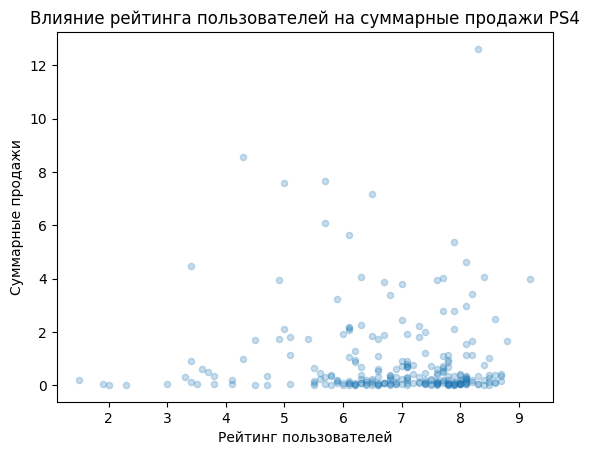

Коэффициент корреляции составляет: -0.04


In [ ]:
# построим диаграмму рассеяния
ps4_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга пользователей на суммарные продажи PS4')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_user_ps4 = ps4_data['total_sales'].corr(ps4_data['user_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_user_ps4}')

**Вывод:** коэффициент корреляции практически равен нулю, значит, связи между рейтингами пользователей и продажи не существует.

Построим диаграму рассеивания и найдем коэффициент корреляции для платформы Xbox One:

In [ ]:
xone_data = (
    actual_data
    .query('platform == "XOne"')
    .reset_index(drop=True)
)
xone_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Другие,7.39
1,165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
2,179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
3,241,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
4,269,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


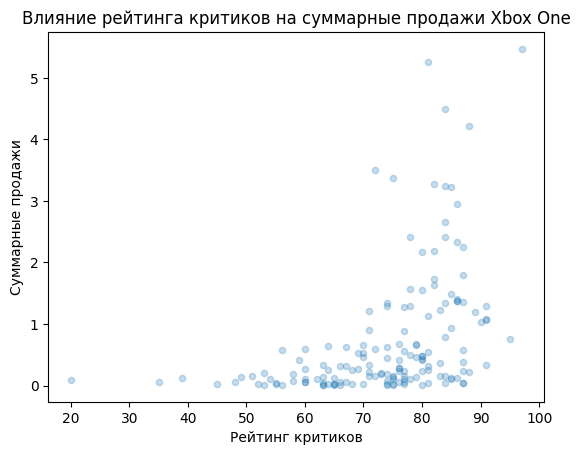

Коэффициент корреляции составляет: 0.429


In [ ]:
# построим диаграмму рассеяния
xone_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга критиков на суммарные продажи Xbox One')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic_xone = xone_data['total_sales'].corr(xone_data['critic_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic_xone}')

Построим диаграму рассеивания и найдем коэффициент корреляции:

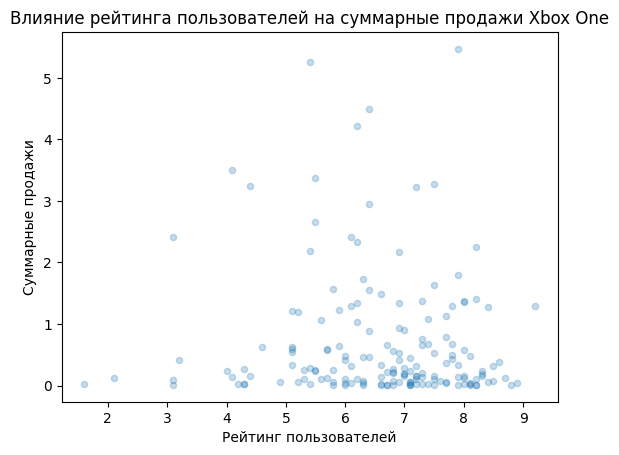

Коэффициент корреляции составляет: -0.07


In [ ]:
# построим диаграмму рассеяния
xone_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга пользователей на суммарные продажи Xbox One')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_user_xone = xone_data['total_sales'].corr(xone_data['user_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_user_xone}')

**Вывод:** для платформы Xbox One наблюдается такая же картина: рейтинг критиков имеет связь, а рейтинг пользователей не имеет.

Построим диаграму рассеивания и найдем коэффициент корреляции для платформы PS3:

In [ ]:
ps3_data = (
    actual_data
    .query('platform == "PS3"')
    .reset_index(drop=True)
)
ps3_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,Другие,5.27
1,254,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
2,263,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
3,548,FIFA 16,PS3,2015,Sports,0.41,1.84,0.05,0.40,NaN,3.2,E,2.70
4,1010,Watch Dogs,PS3,2014,Action,0.56,0.81,0.10,0.27,NaN,5.1,M,1.74


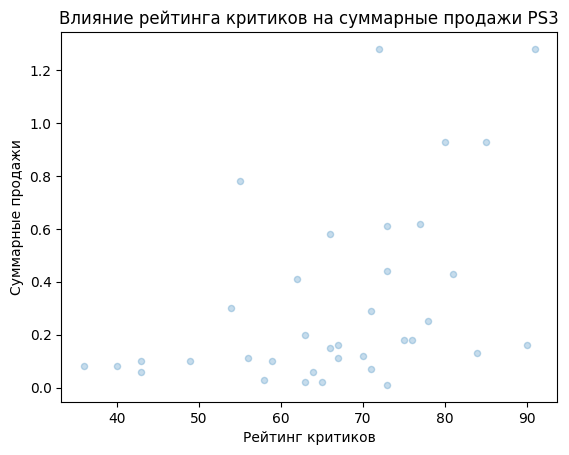

Коэффициент корреляции составляет: 0.447


In [ ]:
# построим диаграмму рассеяния
ps3_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга критиков на суммарные продажи PS3')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic_ps3 = ps3_data['total_sales'].corr(ps3_data['critic_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic_ps3}')

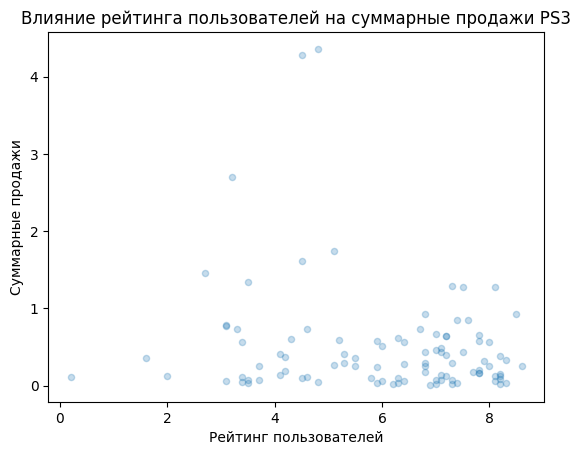

Коэффициент корреляции составляет: -0.167


In [ ]:
# построим диаграмму рассеяния
ps3_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга пользователей на суммарные продажи PS3')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_user_ps3 = ps3_data['total_sales'].corr(ps3_data['user_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_user_ps3}')

Построим диаграму рассеивания и найдем коэффициент корреляции для платформы Xbox 360:

In [ ]:
x360_data = (
    actual_data
    .query('platform == "X360"')
    .reset_index(drop=True)
)
x360_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,262,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.0,0.40,NaN,4.9,M,4.28
1,490,FIFA 15,X360,2014,Sports,0.79,1.92,0.0,0.21,NaN,4.2,E,2.92
2,818,Madden NFL 15,X360,2014,Sports,1.77,0.06,0.0,0.22,NaN,5.5,E,2.05
3,887,Destiny,X360,2014,Shooter,1.31,0.43,0.0,0.18,NaN,4.7,T,1.92
4,1038,Call of Duty: Black Ops 3,X360,2015,Shooter,1.14,0.40,0.0,0.16,NaN,NaN,Другие,1.70


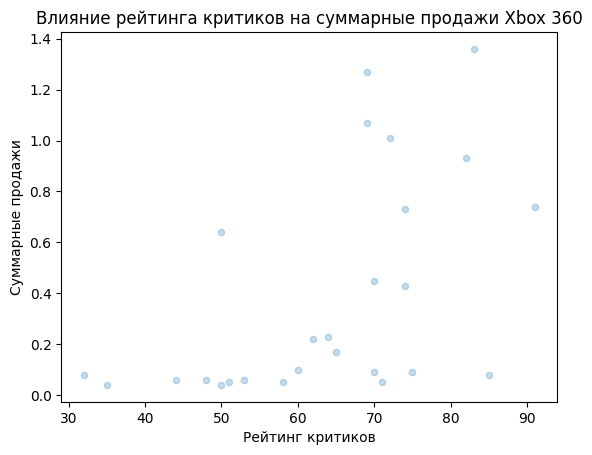

Коэффициент корреляции составляет: 0.526


In [ ]:
# построим диаграмму рассеяния
x360_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга критиков на суммарные продажи Xbox 360')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic_x360 = x360_data['total_sales'].corr(x360_data['critic_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic_x360}')

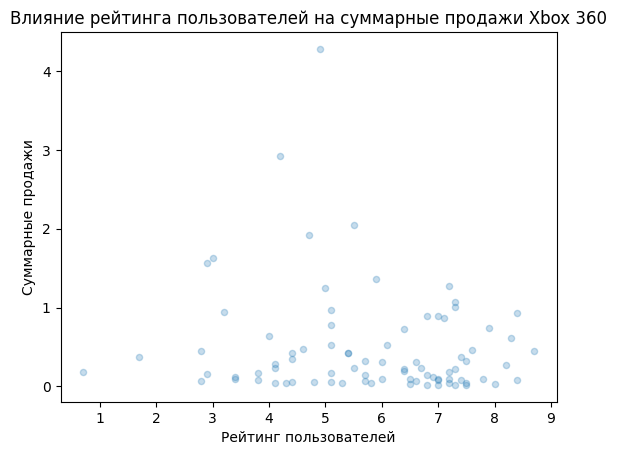

Коэффициент корреляции составляет: -0.138


In [ ]:
# построим диаграмму рассеяния
x360_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга пользователей на суммарные продажи Xbox 360')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_user_x360 = x360_data['total_sales'].corr(x360_data['user_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_user_x360}')

In [ ]:
ds3_data = (
    actual_data
    .query('platform == "3DS"')
    .reset_index(drop=True)
)
ds3_data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Другие,11.68
1,96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Другие,7.55
2,108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,Другие,7.14
3,311,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
4,404,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,Другие,3.32


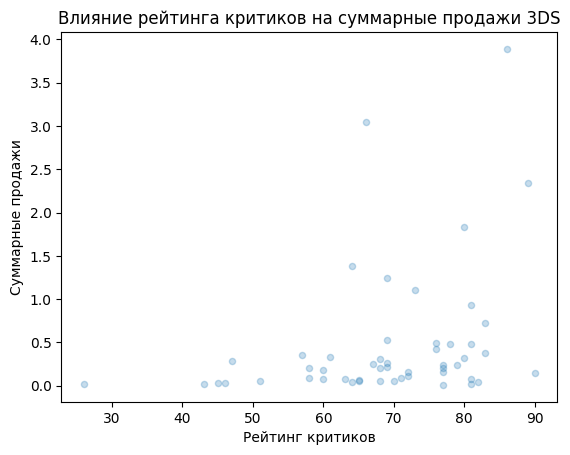

Коэффициент корреляции составляет: 0.314


In [ ]:
# построим диаграмму рассеяния
ds3_data.plot(
    x='critic_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга критиков на суммарные продажи 3DS')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic_ds3 = ds3_data['total_sales'].corr(ds3_data['critic_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic_ds3}')

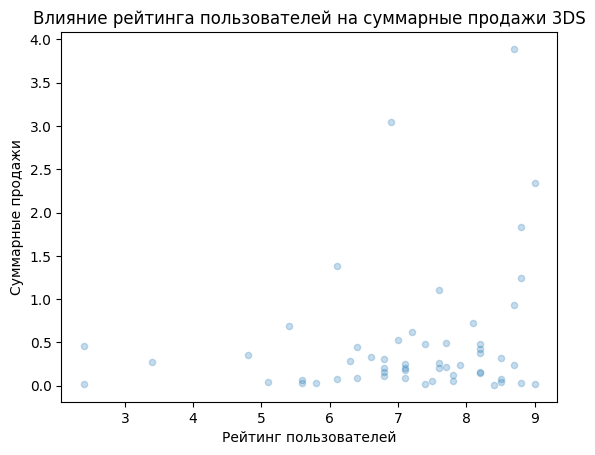

Коэффициент корреляции составляет: 0.215


In [ ]:
# построим диаграмму рассеяния
ds3_data.plot(
    x='user_score',
    y='total_sales',
    kind='scatter',
    alpha=0.25
    )
plt.title('Влияние рейтинга пользователей на суммарные продажи 3DS')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_user_ds3 = ds3_data['total_sales'].corr(ds3_data['user_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_user_ds3}')

Построим диаграммы рассеяния для всех платформ:

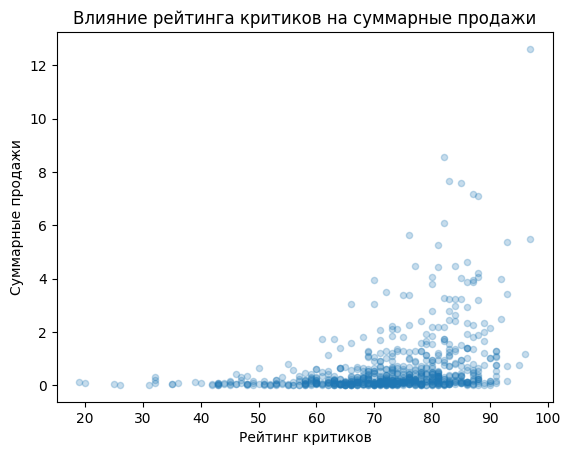

Коэффициент корреляции составляет: 0.328


In [ ]:
# построим диаграмму рассеяния
actual_data.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.25)
plt.title('Влияние рейтинга критиков на суммарные продажи')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic = actual_data['total_sales'].corr(actual_data['critic_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic}')

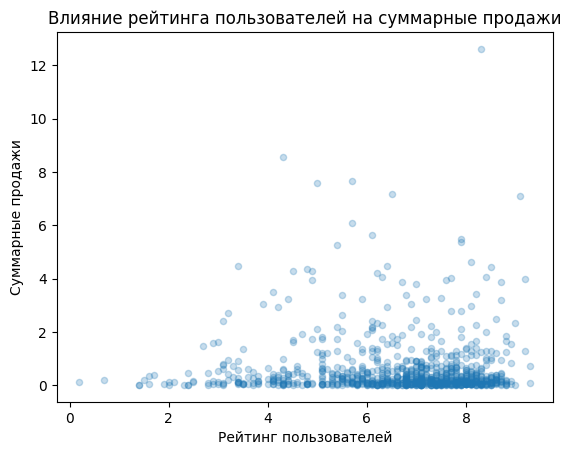

Коэффициент корреляции составляет: -0.013


In [ ]:
# построим диаграмму рассеяния
actual_data.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.25)
plt.title('Влияние рейтинга пользователей на суммарные продажи')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# найдем коэффициент корреляции
corr_critic = actual_data['total_sales'].corr(actual_data['user_score']).round(3)
print(f'Коэффициент корреляции составляет: {corr_critic}')

**Вывод:** были построены диаграммы рассеяния и посчитаны коэффициенты корреляции. Во всех случаях наблюдается схожая картин: имеется слабая связь рейтинга критиков на суммарные продажи, тогда как рейтинги пользователей на них не влияют - коэффициент корреляции во всех случаях в районе нуля.

### Исследование влияния жанра на продажи

Найдем суммарные продажи по жанрам:

In [ ]:
aggregated_data_new = (
    actual_data
    .groupby(['genre'])
    .agg({'total_sales':'sum'})
)
aggregated_data_new.sort_values(by='total_sales')

,total_sales
genre,
Puzzle,2.21
Strategy,3.96
Simulation,13.13
Adventure,17.55
Platform,18.09
Racing,27.52
Fighting,28.22
Misc,37.55
Role-Playing,101.44


In [ ]:
aggregated_data_new_2 = (
    actual_data
    .groupby(['genre'])
    .agg({'total_sales':'median'})
)
aggregated_data_new.sort_values(by='total_sales')

,total_sales
genre,
Puzzle,2.21
Strategy,3.96
Simulation,13.13
Adventure,17.55
Platform,18.09
Racing,27.52
Fighting,28.22
Misc,37.55
Role-Playing,101.44


Построим столбчатую диаграмму:

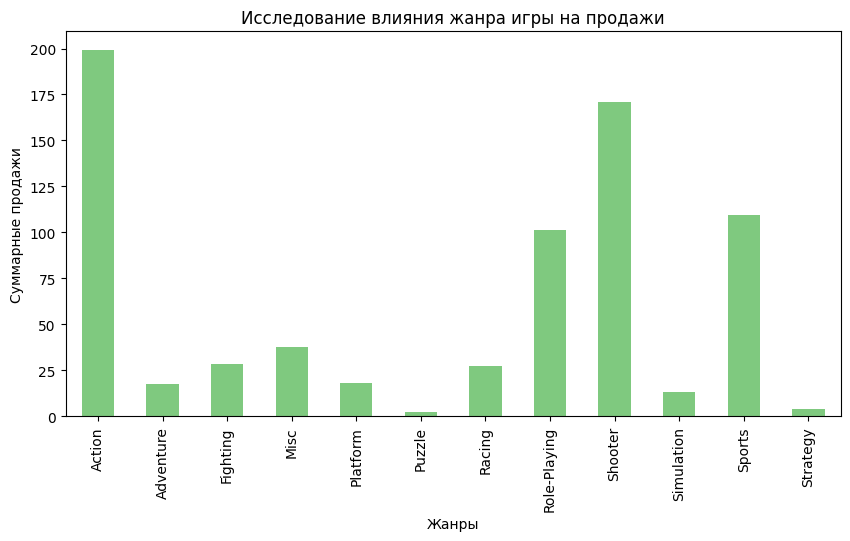

In [ ]:
aggregated_data_new.plot(
    kind='bar',
    figsize=(10, 5),
    title='Исследование влияния жанра игры на продажи',
    legend=False,
    xlabel='Жанры',
    ylabel='Суммарные продажи',
    cmap='Accent'
)
plt.show()

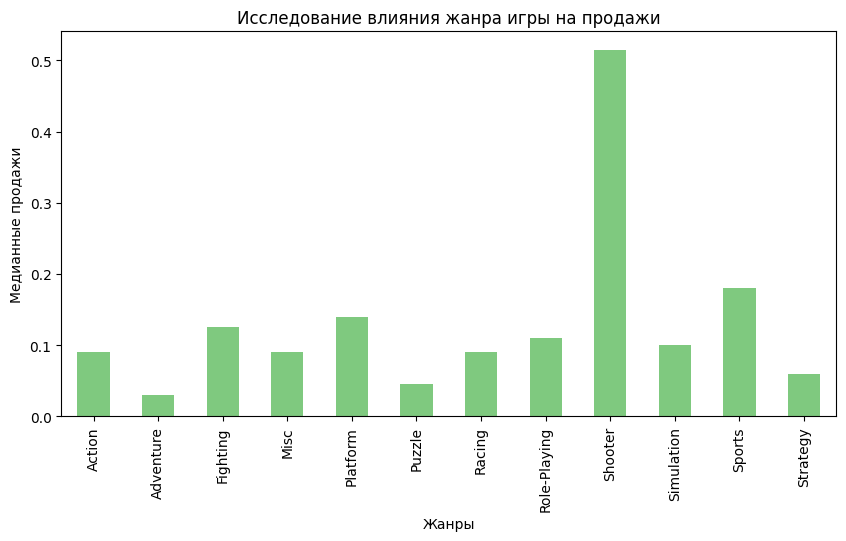

In [ ]:
aggregated_data_new_2.plot(
    kind='bar',
    figsize=(10, 5),
    title='Исследование влияния жанра игры на продажи',
    legend=False,
    xlabel='Жанры',
    ylabel='Медианные продажи',
    cmap='Accent'
)
plt.show()

**Вывод:**
* для **суммарных** продаж самые прибыльные жанры - экшн и шутеры, а жанры с самими низкими продажами - паззлы и стратегии;

* для **медианных продаж** в топе жанров шутеры и спортивные игры, а жанры с самыми низкими продажами - паззлы и приключения.

### Портрет пользователя каждого региона

Найдем самые популярные платформы в Северной Америке:

In [ ]:
platforms_na = (
    actual_data
    .groupby(['platform'])
    .agg({'na_sales':'sum'})
    .reset_index()
)
platforms_na = (platforms_na
                    .sort_values(by='na_sales',
                                 ascending=False)
                    .reset_index(drop=True)
)
platforms_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


Найдем сумму продаж платформ, не входящих в топ-5:

In [ ]:
others_sales_na = platforms_na.loc[5:9, 'na_sales'].sum()

Удалим строки, не входящие в топ-5:

In [ ]:
top_platforms_na = platforms_na.drop(index=[5, 6, 7, 8, 9])
top_platforms_na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


Добавим в датафрейм категорию "Другие":

In [ ]:
row_na = {
    'platform': "Другие",
    'na_sales': others_sales_na
    }
df_row_na = pd.DataFrame([row_na])
top_platforms_na = pd.concat([top_platforms_na, df_row_na], ignore_index=True)
top_platforms_na = top_platforms_na.set_index('platform', drop=True)
top_platforms_na

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
Другие,31.19


Построим круговую диаграмму распределения самых популярных платформ по продажам в Северной Америке:

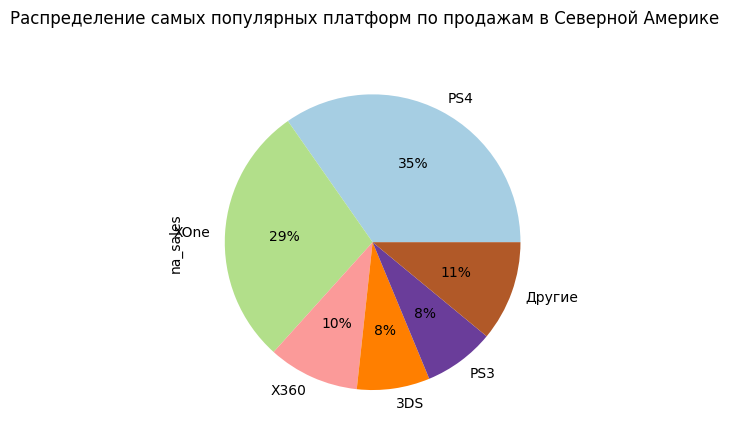

In [ ]:
top_platforms_na.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Распределение самых популярных платформ по продажам в Северной Америке',
    cmap='Paired'
)
plt.show()

Найдем самые популярные платформы в Европе:

In [ ]:
platforms_eu = (
    actual_data
    .groupby(['platform'])
    .agg({'eu_sales':'sum'})
    .reset_index()
)
platforms_eu = (platforms_eu
                    .sort_values(by='eu_sales',
                                 ascending=False)
                    .reset_index(drop=True)
)
platforms_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,X360,15.49
6,WiiU,13.15
7,PSV,3.53
8,Wii,2.59
9,PSP,0.00


Найдем сумму продаж платформ, не входящих в топ-5:

In [ ]:
others_sales_eu = platforms_eu.loc[5:9, 'eu_sales'].sum()

Удалим строки, не входящие в топ-5:

In [ ]:
top_platforms_eu = platforms_eu.drop(index=[5, 6, 7, 8, 9])
top_platforms_eu

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


Добавим в датафрейм категорию "Другие":

In [ ]:
row_eu = {
    'platform': "Другие",
    'eu_sales': others_sales_eu
    }
df_row_eu = pd.DataFrame([row_eu])
top_platforms_eu = pd.concat([top_platforms_eu, df_row_eu], ignore_index=True)
top_platforms_eu = top_platforms_eu.set_index('platform', drop=True)
top_platforms_eu

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
Другие,34.76


Построим круговую диаграмму распределения самых популярных платформ по продажам в Европе:

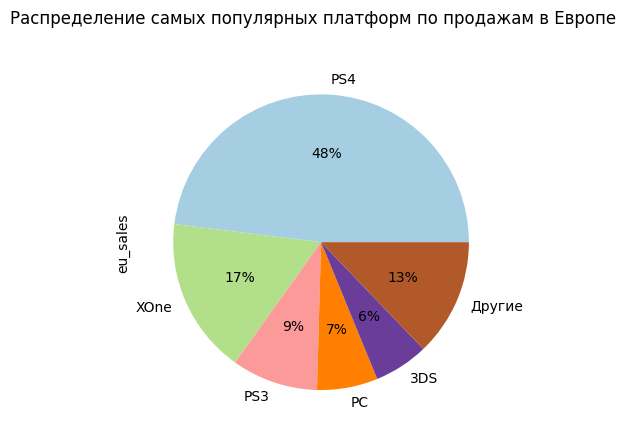

In [ ]:
top_platforms_eu.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Распределение самых популярных платформ по продажам в Европе',
    cmap='Paired'
)
plt.show()

Найдем самые популярные платформы в Японии:

In [ ]:
platforms_jp = (
    actual_data
    .groupby(['platform'])
    .agg({'jp_sales':'sum'})
    .reset_index()
)
platforms_jp = (platforms_jp
                    .sort_values(by='jp_sales',
                                 ascending=False)
                    .reset_index(drop=True)
)
platforms_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,PSP,0.36
6,XOne,0.32
7,X360,0.08
8,PC,0.00
9,Wii,0.00


Найдем сумму продаж платформ, не входящих в топ-5:

In [ ]:
others_sales_jp = platforms_jp.loc[5:9, 'jp_sales'].sum()

Удалим строки, не входящие в топ-5:

In [ ]:
top_platforms_jp = platforms_jp.drop(index=[5, 6, 7, 8, 9])
top_platforms_jp

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


Добавим в датафрейм категорию "Другие":

In [ ]:
row_jp = {
    'platform': "Другие",
    'jp_sales': others_sales_jp
    }
df_row_jp = pd.DataFrame([row_jp])
top_platforms_jp = pd.concat([top_platforms_jp, df_row_jp], ignore_index=True)
top_platforms_jp = top_platforms_jp.set_index('platform', drop=True)
top_platforms_jp

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
Другие,0.76


Построим круговую диаграмму распределения самых популярных платформ по продажам в Японии:

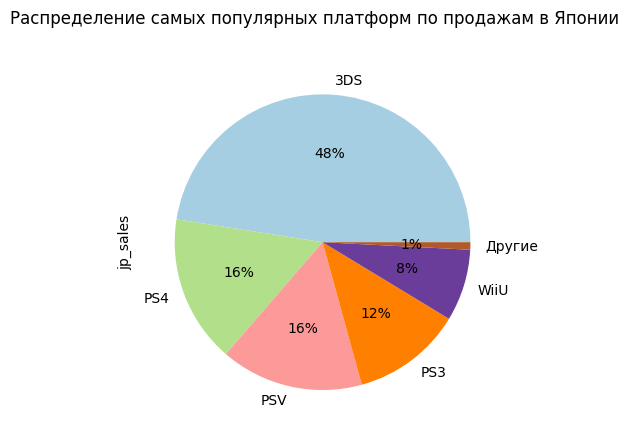

In [ ]:
top_platforms_jp.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Распределение самых популярных платформ по продажам в Японии',
    cmap='Paired'
)
plt.show()

**Вывод:** самые популярные платформы в Северной Америке и в Европе совпадают - на первом месте PS4, а на второй Xbox One. В Японии же ситуации отличается, там самая популярная платформа - Nintendo 3DS, затем идут модели PlayStation. Консоли от Microsoft в Японии вообще не котируются.

По аналогии построим круговые диаграммы для жанров:

Найдем самые популярные жанры в Северной Америке:

In [ ]:
genres_na = (
    actual_data
    .groupby(['genre'])
    .agg({'na_sales':'sum'})
    .reset_index()
)
genres_na = (genres_na
                    .sort_values(by='na_sales',
                                 ascending=False)
                    .reset_index(drop=True)
)
genres_na

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,Fighting,12.43
6,Racing,8.74
7,Platform,6.79
8,Adventure,5.64
9,Simulation,2.63


Найдем сумму продаж жанров, не входящих в топ-5:

In [ ]:
others_genres_na = genres_na.loc[5:11, 'na_sales'].sum()

Удалим строки, не входящие в топ-5:

In [ ]:
top_genres_na = genres_na.drop(index=[5, 6, 7, 8, 9, 10, 11])
top_genres_na

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


Добавим в датафрейм категорию "Другие":

In [ ]:
row_genres_na = {
    'genre': "Другие",
    'na_sales': others_genres_na
    }
df_row_genres_na = pd.DataFrame([row_genres_na])
top_genres_na = pd.concat([top_genres_na, df_row_genres_na], ignore_index=True)
top_genres_na = top_genres_na.set_index('genre', drop=True)
top_genres_na

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
Другие,37.86


Построим круговую диаграмму распределения самых популярных жанров по продажам в Северной Америке:

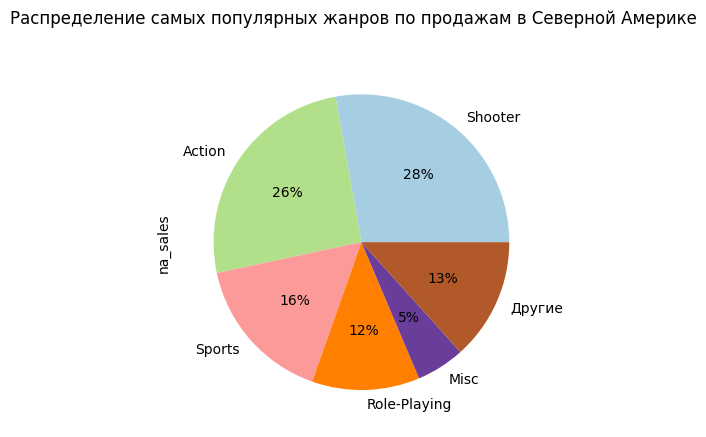

In [ ]:
top_genres_na.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Распределение самых популярных жанров по продажам в Северной Америке',
    cmap='Paired'
)
plt.show()

Найдем самые популярные жанры в Европе:

In [ ]:
genres_eu = (
    actual_data
    .groupby(['genre'])
    .agg({'eu_sales':'sum'})
    .reset_index()
)
genres_eu = (genres_eu
                    .sort_values(by='eu_sales',
                                 ascending=False)
                    .reset_index(drop=True)
)
genres_eu

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,Misc,12.86
6,Simulation,7.30
7,Platform,6.80
8,Fighting,6.69
9,Adventure,6.49


Найдем сумму продаж жанров, не входящих в топ-5:

In [ ]:
others_genres_eu = genres_eu.loc[5:11, 'eu_sales'].sum()

Удалим строки, не входящие в топ-5:

In [ ]:
top_genres_eu = genres_eu.drop(index=[5, 6, 7, 8, 9, 10, 11])
top_genres_eu

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


Добавим в датафрейм категорию "Другие":

In [ ]:
row_genres_eu = {
    'genre': "Другие",
    'eu_sales': others_genres_eu
    }
df_row_genres_eu = pd.DataFrame([row_genres_eu])
top_genres_eu = pd.concat([top_genres_eu, df_row_genres_eu], ignore_index=True)
top_genres_eu = top_genres_eu.set_index('genre', drop=True)
top_genres_eu

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
Другие,42.45


Построим круговую диаграмму распределения самых популярных жанров по продажам в Европе:

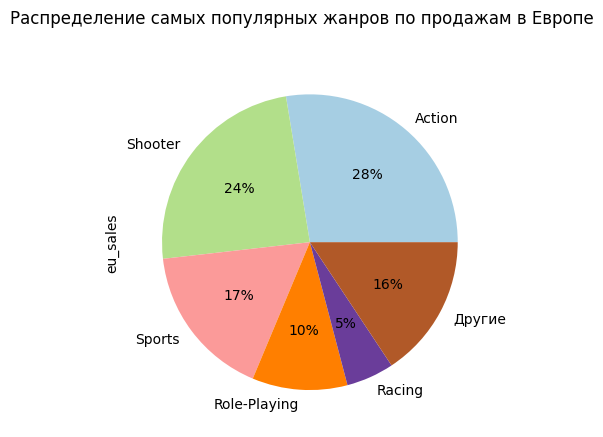

In [ ]:
top_genres_eu.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Распределение самых популярных жанров по продажам в Европе',
    cmap='Paired'
)
plt.show()

Найдем самые популярные жанры в Японии:

In [ ]:
genres_jp = (
    actual_data
    .groupby(['genre'])
    .agg({'jp_sales':'sum'})
    .reset_index()
)
genres_jp = (genres_jp
                    .sort_values(by='jp_sales',
                                 ascending=False)
                    .reset_index(drop=True)
)
genres_jp

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87
5,Adventure,3.60
6,Sports,3.26
7,Platform,2.69
8,Simulation,2.31
9,Racing,1.76


Найдем сумму продаж жанров, не входящих в топ-5:

In [ ]:
others_genres_jp = genres_jp.loc[5:11, 'jp_sales'].sum()

Удалим строки, не входящие в топ-5:

In [ ]:
top_genres_jp = genres_jp.drop(index=[5, 6, 7, 8, 9, 10, 11])
top_genres_jp

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Добавим в датафрейм категорию "Другие":

In [ ]:
row_genres_jp = {
    'genre': "Другие",
    'jp_sales': others_genres_jp
    }
df_row_genres_jp = pd.DataFrame([row_genres_jp])
top_genres_jp = pd.concat([top_genres_jp, df_row_genres_jp], ignore_index=True)
top_genres_jp = top_genres_jp.set_index('genre', drop=True)
top_genres_jp

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
Другие,15.50


Построим круговую диаграмму распределения самых популярных жанров по продажам в Европе:

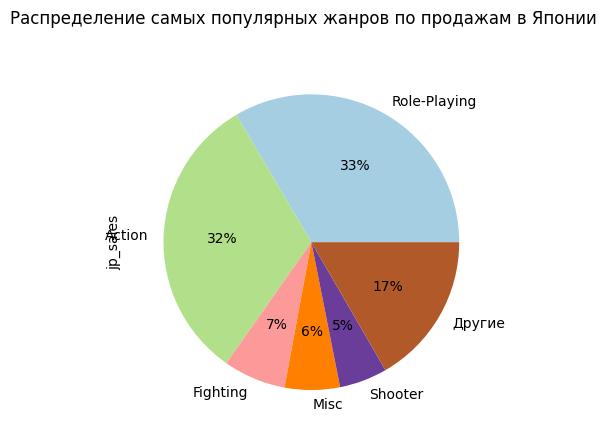

In [ ]:
top_genres_jp.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Распределение самых популярных жанров по продажам в Японии',
    cmap='Paired'
)
plt.show()

**Вывод:** как и в случае с платформами, Северная Америка и Европа показывают схожие результаты, тогда как Япония координально отличается. В СА и в Европе пользуются спросом игры в жанрах шутер и экш, тогда как в Японии - РПГ и экшн.

Посмотрим как влияют на продажи игр рейтпнг ESRB в Северной Америке:

In [ ]:
esrb_rating_na = (
    actual_data
    .groupby(['rating'])
    .agg({'na_sales':'sum'})
)
esrb_rating_na.sort_values(by='na_sales')

,na_sales
rating,
E10+,33.23
T,38.95
E,50.74
Другие,64.72
M,96.42


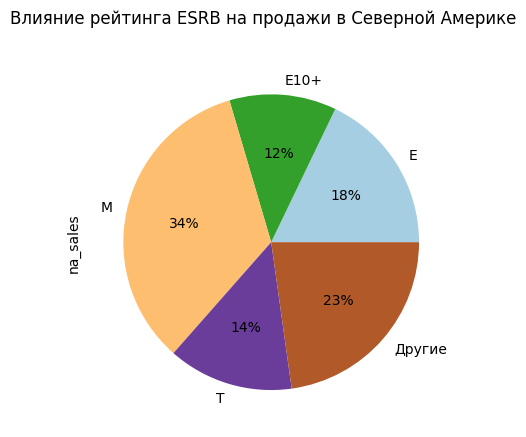

In [ ]:
esrb_rating_na.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Влияние рейтинга ESRB на продажи в Северной Америке',
    cmap='Paired'
)
plt.show()

Посмотрим как влияют на продажи игр рейтпнг ESRB в Европе:

In [ ]:
esrb_rating_eu = (
    actual_data
    .groupby(['rating'])
    .agg({'eu_sales':'sum'})
)
esrb_rating_eu.sort_values(by='eu_sales')

,eu_sales
rating,
E10+,26.16
T,34.07
E,58.06
Другие,58.95
M,93.44


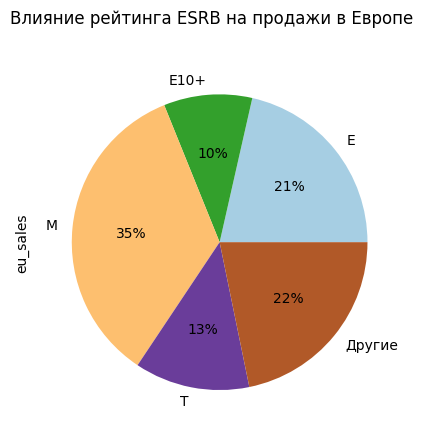

In [ ]:
esrb_rating_eu.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Влияние рейтинга ESRB на продажи в Европе',
    cmap='Paired'
)
plt.show()

Посмотрим как влияют на продажи игр рейтпнг ESRB в Японии:

In [ ]:
esrb_rating_jp = (
    actual_data
    .groupby(['rating'])
    .agg({'jp_sales':'sum'})
)
esrb_rating_jp.sort_values(by='jp_sales')

,jp_sales
rating,
E10+,4.46
M,8.01
E,8.94
T,14.78
Другие,56.90


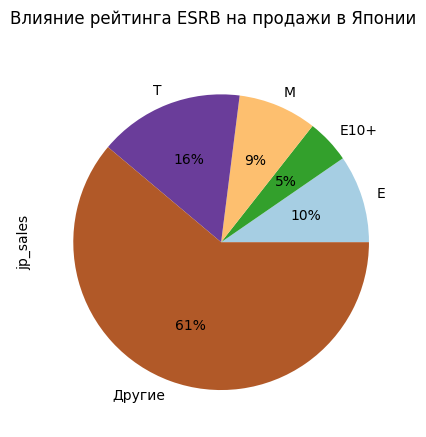

In [ ]:
esrb_rating_jp.plot(
    subplots=True,
    legend=False,
    kind='pie',
    autopct='%1.0f%%',
    title='Влияние рейтинга ESRB на продажи в Японии',
    cmap='Paired'
)
plt.show()

**Вывод:**
* в Северной Америке и в Европе самые популярные игры с рейтингом M - 17+, примечательно, что вторые по популярности продаются игры, не имеющие маркировку ESRB;
* в Японии и вовсе почти две трети игр продаются без маркировки рейтинга ESRB. Вторые по популярности игры с рейтингом T - игры для подростков от 13 лет.

## Проверка гипотез

### Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Найдем среднее значение пользовательского рейтинга для обеих платформ:

In [ ]:
actual_data.query('platform == "XOne"')['user_score'].mean().round(3)

6.595

In [ ]:
actual_data.query('platform == "PC"')['user_score'].mean().round(3)

6.298

В качестве нулевой гипотезы предположим, что рейтинги равны, значит альтернативная гипотеза будет заключаться в неравенстве рейтингов друг другу - это двусторонняя альтернативная гипотеза. Для проверки гипотез будем использовать t-критерий Стьюдента, так как исследуются две независимые выборки.

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:** средние пользовательские рейтинги игр на платформе Xbox не равны рейтингам на PC.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    actual_data.query('platform == "XOne"')['user_score'],
    actual_data.query('platform == "PC"')['user_score'],
    nan_policy='omit',
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-value: 0.10450507919348416
Не получилось отвергнуть гипотезу


**Вывод:** исследовались две независимые выборки, поэтому был использован метод scipy.stats.ttest_ind. Так как p-value больше статистической значимости, значит нулевая гипотеза не отвергается - рейтинги игр для Xbox One и PС примерно одинаковые.

### Гипотеза №2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Найдем средние значения жанров:

In [ ]:
actual_data.query('genre == "Action"')['user_score'].mean().round(3)

6.761

In [ ]:
actual_data.query('genre == "Sports"')['user_score'].mean().round(3)

5.225

В качестве нулевой гипотезы предположим, что рейтинги жанров равны, тогда в альтернативной будем проверять неравенство этих рейтингов. Для проверки гипотез будем использовать t-критерий Стьюдента, так как исследуются две независимые выборки.

**Нулевая гипотеза:** средние пользовательские рейтинги жанра Action и жанра Sports примерно одинаковые.

**Альтернативная гипотеза:** средний пользовательский рейтинг жанра Action не равен рейтингу жанра Sports.

In [ ]:
alpha = 0.05

results = st.ttest_ind(
    actual_data.query('genre == "Action"')['user_score'],
    actual_data.query('genre == "Sports"')['user_score'],
    nan_policy='omit'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем гипотезу')
else:
    print('Не получилось отвергнуть гипотезу')

p-value: 2.871114798510586e-19
Отвергаем гипотезу


**Вывод:** исследовались две независимые выборки, поэтому был использован метод scipy.stats.ttest_ind. Так как p-value меньше статистической значимости, значит нулевая гипотеза отвергается - рейтинги жанров экш и спорт действительно отличаются.

## Общий вывод

В данной проектной работе было проведено исследование с целью спрогнозировать кампанию по продаже игр на 2017 год.

На шаге предобработки данных были:
1. удалены строки с пропущенными значениями в столбцах `name`, `genre` и `year_of_release` - их кол-во составило около 1.6 %, а значит удаление не повлияло на дальнейшее исследование. Пропуски в столбцах `critic_score`, `user_score` и `rating` нельзя удалять, так как кол-во пропущенных значений очень большое относительно размера датасета, а заменить их также не представляется возможным, потому что оценки и рейтинг индивидуальны для каждой игры и не зависят от параметров, представленных в исходном датасете.
2. в столбцах `year_of_release` и `user_score` были скорректированы типы данных;
3. были рассчитаны суммарные продажи игр во всех регионах в столбце `total_sales`.

На шаге исследовательского анализа данных были:
1. построено распредление игр по годам: пик индустрии пришелся на 2008-2009 года, а начиная с 2012 года начался спад;
2. построено распределение продаж игр по платформам: самыми популярными платформами оказались PlayStation 2 и Nintendo DS - за весь период их существования эти платформы стали рекордсменами по количеству проданных игр;
3. был определен актуальный период, по которому можно достоверно спрогнозировать кампанию на 2017 год - были взяты данные с 2014 года;
4. по данным за акутальный период стало понятно, что лучшего всего продаются игры для PS4 и Xbox One, что неудивительно, так как на тот момент это были консоли нового поколения. Это подтверждают построенные гистограммы и "график ящик с усами";
5. также п построенным графикам рассеивания и коэффициентам корреляции видно, что рейтинг пользователей не влияет на продажи - коэффициент корреляции близко к 0, а вот слабая зависимость от рейтинга критиков присутствует - она колеблется в районе 0.4.

На следующем шаге был составлен портрет пользователя: американцы и европейцы в целом сходятся в своих предпочтениях - самыми популярными платформы у них являются PS4 и Xbox One (39 и 32% у американцев соответсвенно, и 56 и 20% у европейцев). Японцы же совершенно не котируют модели Xbox - меньше 1% и предпочитают 3DS и модели PlayStation. Рейтинг игр по регионам распределился следуюзщим образом: американцы и европейцы предпочитают игры 17+ - он маркируется M, а японцы любят подростковые игры с рейтингом T.

На стадии статистического анализа были рассмотрены две гипотезы. В обеих гипотезах применялся метод st.ttest_ind(), так как в данном случае проверяются две независимые выборки. Проверялись следующие гипотезы:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые. В данном случае p-value больше статистической значимости, значит нулевая гипотеза не отвергается - рейтинги игр для Xbox One и PС примерно одинаковые;
2. средние пользовательские рейтинги жанров Action и Sports разные. В этом случае отвергаем нулевую гипотезу - рейтинги жанров отличаются.

Таким образом, в данной исследовательской работе был составлен портрет пользователя, а также были исследованы зависимости, позволяющие определить, какие игры, как по жанру, так и по рейтингу, а также в зависимости от платформы, смогут принести наибольшую выручку в зависимости от региона, позволяющие сделать вывод о том, что:
1. в Северной Америке, при формировании бюджета, необходимо ориентироваться на игры для PS4 и Xbox One (64% рынка);
2. в Европе также популярны консоли PS4 и Xbox One (65% рынка);
3. в Японии очень популярны портативные консоли, на 3DS и PSV приходится больше половины рынка (64%), также японцы предпочитают играть в PS4 (16%);
4. самый популярный жанр во всех регионах - экшн, а рекламировать игры в Северной Америке и Европе лучше с маркировкой M рейтинга ESRB, тогда как в Японии хорошо продаются только игры с маркировкой рейтинга CERO;
5. при закупке игр важно смотреть как их оценили критики, так как для пользователя это также является одним из факторов при выборе игры - об этом свидетельствует найденный коэффициент корреляции.
